# Truncated Domain, $\chi$

## Table of Contents
* [1) Standard Plot of Paths on Domain](#first-bullet)
    - [1a) Geometric Brownian Motion](#firsta-bullet)
    - [1b) Merton Jump Process](#firstb-bullet)
    - [1c) Constant Elasticity of Variance](#firstc-bullet)
* [2) Truncated Domain - Jump Merton Figure](#second-bullet)

## Setup

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# local
from DC import DynamicChebyshev
from figs import plot_truncated_domain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Standard Plot of Paths on Domain <a class="anchor" id="first-bullet"></a>

### 1a) Geometric Brownian Motion <a class="anchor" id="firsta-bullet"></a>

In [4]:
# initialize instance from class
DC_option_pricing = DynamicChebyshev(r=0.03, S0=36., K=40., T=1., σ=0.25, λ=0.4, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain = DC_option_pricing.calculate_truncated_domain_GBM()
xknots = DC_option_pricing.calculate_nodal_points(domain)
BS = DC_option_pricing.generate_GBM_path(xknots)
Γ = DC_option_pricing.compute_generalized_moments(domain, xknots)

# online phase
DC_option_pricing.price_option_with_dynamic_chebyshev(xknots, Γ)

(array(6.05657886), 0.09141582158455348)

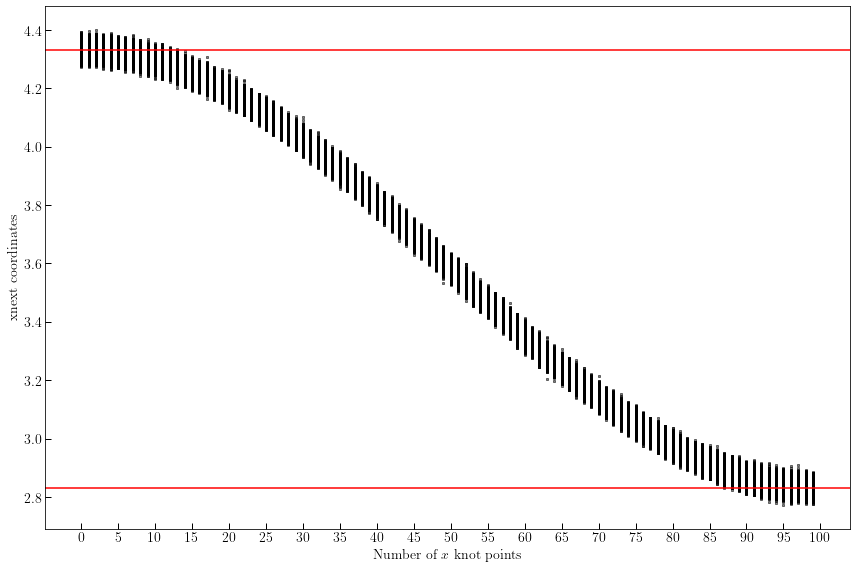

In [5]:
# input to function
chebyshev_polynomials = DC_option_pricing.n_chebyshev_pol
x_next = DC_option_pricing.x_next
output_path = "../Results/plots/TruncatedDomainGBM.png"

# plot
plot_truncated_domain(domain, chebyshev_polynomials, x_next, output_path)

### 1b) Merton Jump Process <a class="anchor" id="firstb-bullet"></a>

In [6]:
# initialize instance from class
DC_option_pricing_merton = DynamicChebyshev(r=0.03, S0=36., K=40., T=1., σ=0.25, λ=0.4, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain = DC_option_pricing_merton.calculate_truncated_domain_JumpMerton(α=-0.5, β=0.4)
xknots = DC_option_pricing_merton.calculate_nodal_points(domain)
JumpMerton = DC_option_pricing_merton.generate_Jump_path(xknots, α=-0.5, β=0.4)
Γ = DC_option_pricing_merton.compute_generalized_moments(domain, xknots)

# online phase
DC_option_pricing_merton.price_option_with_dynamic_chebyshev(xknots, Γ)

(array(8.18949561), 0.12457007133206716)

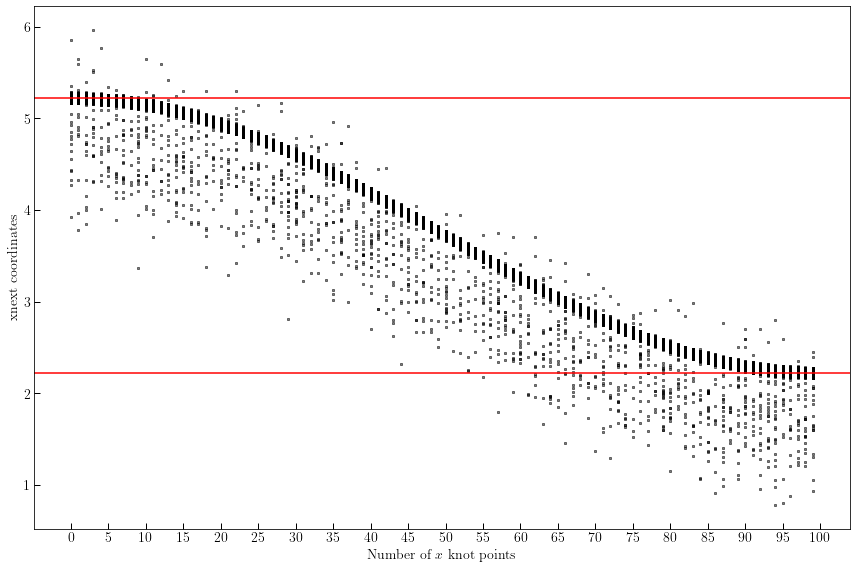

In [7]:
# input to function
chebyshev_polynomials = DC_option_pricing_merton.n_chebyshev_pol
x_next = DC_option_pricing_merton.x_next
output_path = "../Results/plots/TruncatedDomainJumpMerton.png"

# plot
plot_truncated_domain(domain, chebyshev_polynomials, x_next, output_path)

### 1c) Constant Elasticity of Variance Process <a class="anchor" id="firstc-bullet"></a>

In [8]:
# initialize instance from class
DC_option_pricing_CEV = DynamicChebyshev(r=0.03, S0=36., K=40., T=1., σ=0.25, λ=0.4, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain = DC_option_pricing_CEV.calculate_truncated_domain_GBM()
xknots = DC_option_pricing_CEV.calculate_nodal_points(domain)
CEV = DC_option_pricing_CEV.generate_CEV_path(xknots, γ=1.5)
Γ = DC_option_pricing_CEV.compute_generalized_moments(domain, xknots)

# online phase
DC_option_pricing_CEV.price_option_with_dynamic_chebyshev(xknots, Γ)

(array(5.28847317), 0.09220455454417152)

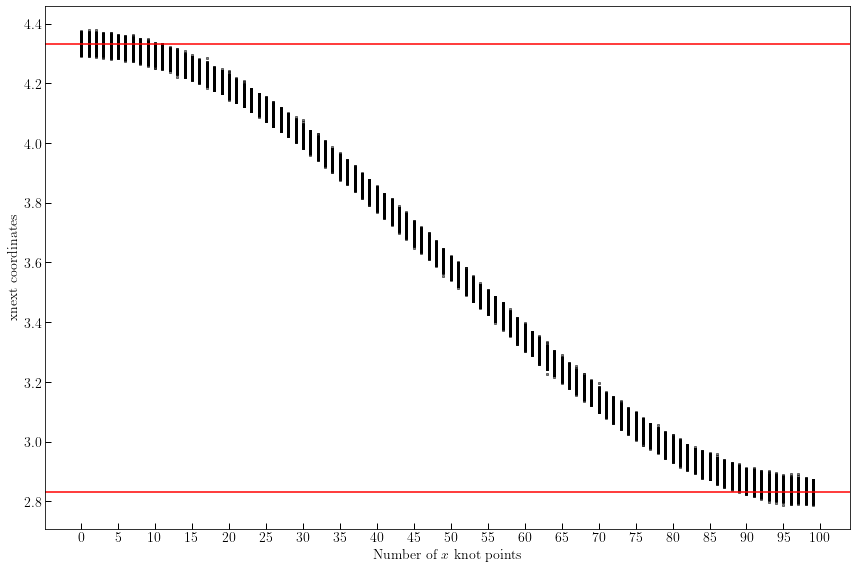

In [9]:
# input to function
chebyshev_polynomials = DC_option_pricing_CEV.n_chebyshev_pol
x_next = DC_option_pricing_CEV.x_next
output_path = "../Results/plots/TruncatedDomainCEV.png"

# plot
plot_truncated_domain(domain, chebyshev_polynomials, x_next, output_path)

## 2) Truncated Domain - Jump Merton Figure <a class="anchor" id="second-bullet"></a>

**Non-adjusted**:

In [11]:
# initialize new instance from class
DC_option_pricing_merton_nonadjusted = DynamicChebyshev(r=0.03, S0=36., K=40., T=1., σ=0.25, λ=0.4, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain_nonadjusted = DC_option_pricing_merton_nonadjusted.calculate_truncated_domain_GBM()
xknots__nonadjusted = DC_option_pricing_merton_nonadjusted.calculate_nodal_points(domain)
JumpMerton = DC_option_pricing_merton_nonadjusted.generate_Jump_path(xknots, α=-0.5, β=0.4)
Γ = DC_option_pricing_merton_nonadjusted.compute_generalized_moments(domain, xknots)

# online phase
DC_option_pricing_merton_nonadjusted.price_option_with_dynamic_chebyshev(xknots, Γ)

(array(6.38270228), 0.08738279366063087)

**Adjusted**:

In [12]:
# initialize instance from class
DC_option_pricing_merton = DynamicChebyshev(r=0.03, S0=36., K=40., T=1., σ=0.25, λ=0.4, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain = DC_option_pricing_merton.calculate_truncated_domain_JumpMerton(α=-0.5, β=0.4)
xknots = DC_option_pricing_merton.calculate_nodal_points(domain)
JumpMerton = DC_option_pricing_merton.generate_Jump_path(xknots, α=-0.5, β=0.4)
Γ = DC_option_pricing_merton.compute_generalized_moments(domain, xknots)

# online phase
DC_option_pricing_merton.price_option_with_dynamic_chebyshev(xknots, Γ)

(array(8.18949561), 0.12457007133206716)

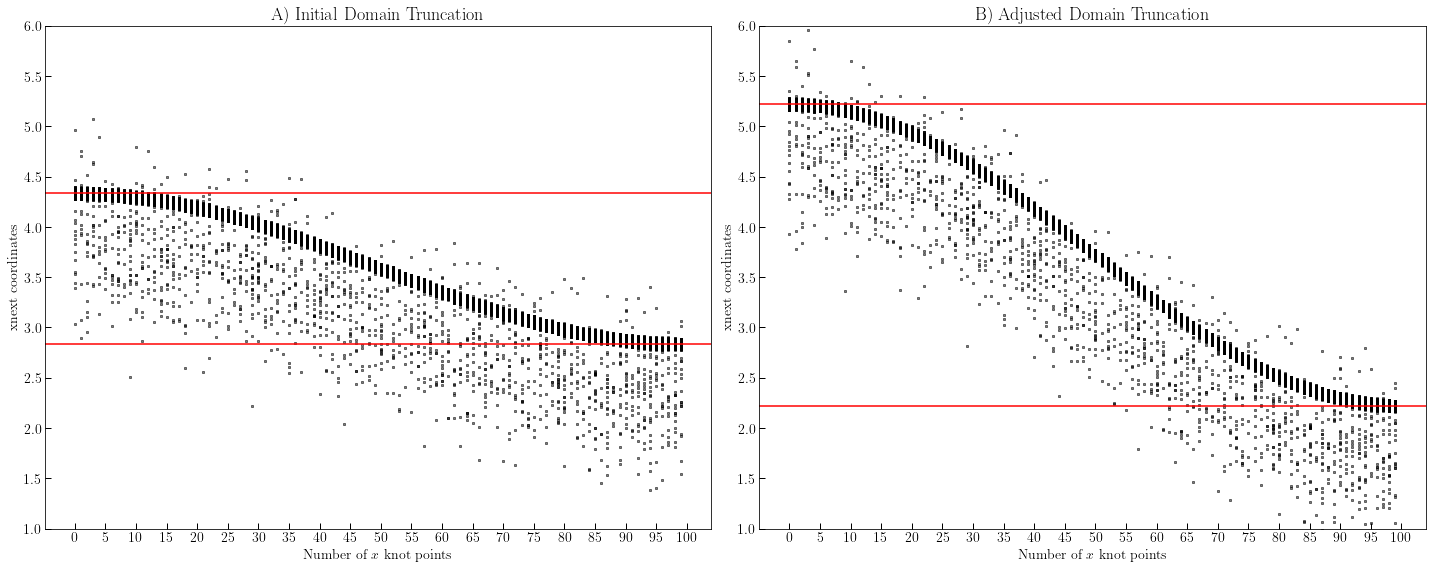

In [16]:
# Initialize figure with two subplots
plt.figure(figsize=(20, 8))

# First subplot for DC_option_pricing
plt.subplot(1, 2, 1)
for i in range(DC_option_pricing_merton_nonadjusted.n_chebyshev_pol):
    plt.scatter([i] * len(DC_option_pricing_merton_nonadjusted.x_next[:, i]), DC_option_pricing_merton_nonadjusted.x_next[:, i], 
                alpha=0.5, color='black', s=8, marker='s', label=f'Knot {i+1}')

# Add truncated domain boundaries
plt.axhline(y=domain_nonadjusted[0], color='r', linestyle='-')
plt.axhline(y=domain_nonadjusted[1], color='r', linestyle='-')
plt.grid(False)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlabel(f'Number of $x$ knot points', fontsize=14)
plt.ylabel(f'xnext coordinates', fontsize=14)
plt.tick_params(axis='both', direction='in', length=6, width=1, colors='black', grid_alpha=0.5, labelsize=14)
plt.title('A) Initial Domain Truncation', size = 18)

plt.ylim(1, 6)  # Set y-axis limits
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Second subplot for DC_option_pricing_merton
plt.subplot(1, 2, 2)
for i in range(DC_option_pricing_merton.n_chebyshev_pol):
    plt.scatter([i] * len(DC_option_pricing_merton.x_next[:, i]), DC_option_pricing_merton.x_next[:, i], 
                alpha=0.5, color='black', s=8, marker='s', label=f'Knot {i+1}')

# Add truncated domain boundaries
plt.axhline(y=domain[0], color='r', linestyle='-')
plt.axhline(y=domain[1], color='r', linestyle='-')
plt.grid(False)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlabel(f'Number of $x$ knot points', fontsize=14)
plt.ylabel(f'xnext coordinates', fontsize=14)
plt.tick_params(axis='both', direction='in', length=6, width=1, colors='black', grid_alpha=0.5, labelsize=14)
plt.title('B) Adjusted Domain Truncation', size = 18)

plt.ylim(1, 6)  # Set y-axis limits
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.tight_layout()

# Check for directory and save the figure
if not os.path.exists("../Results/plots"):
    os.makedirs("../Results/plots")

plt.savefig("../Results/plots/TruncatedDomainAssignment.png", bbox_inches='tight')

# Display the plot
plt.show()